In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.express import bar
import plotly.graph_objs as go
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/archive (20).zip')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.drop(columns=['Row ID','Order ID','Customer ID','Product ID'],axis=1,inplace=True)
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,21/05/2017,28/05/2017,Standard Class,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,GE 30524EE4,235.1880
9798,12/01/2016,17/01/2016,Standard Class,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
prod = df[['Category', 'Sub-Category', 'Product Name', 'Sales']]

fig = px.sunburst(
    prod, path=["Category", "Sub-Category"], values="Sales",
    color="Category",
    title="Sales Breakdown by Category and Subcategory",
    width = 1000,
    height = 600
)

fig.show()


In [ ]:
df.isna().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df['Postal Code']=df['Postal Code'].fillna(df['Postal Code'].mode()[0])
df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
df.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [ ]:
df.drop(['Customer Name'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df['Ship Mode']=lb.fit_transform(df['Ship Mode'])
df['Segment']=lb.fit_transform(df['Segment'])
df['Country']=lb.fit_transform(df['Country'])
df['City']=lb.fit_transform(df['City'])
df['State']=lb.fit_transform(df['State'])
df['Region']=lb.fit_transform(df['Region'])
df['Category']=lb.fit_transform(df['Category'])
df['Sub-Category']=lb.fit_transform(df['Sub-Category'])
df['Product Name']=lb.fit_transform(df['Product Name'])

In [ ]:
df.dtypes

Order Date       object
Ship Date        object
Ship Mode         int64
Segment           int64
Country           int64
City              int64
State             int64
Postal Code     float64
Region            int64
Category          int64
Sub-Category      int64
Product Name      int64
Sales           float64
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order Date'] = df['Order Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y%m%d').astype(int)

In [ ]:
df.dtypes

Order Date        int64
Ship Date         int64
Ship Mode         int64
Segment           int64
Country           int64
City              int64
State             int64
Postal Code     float64
Region            int64
Category          int64
Sub-Category      int64
Product Name      int64
Sales           float64
dtype: object

In [ ]:
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,20171108,20171111,2,0,0,194,15,42420.0,2,0,4,386,261.9600
1,20171108,20171111,2,0,0,194,15,42420.0,2,0,5,838,731.9400
2,20170612,20170616,2,1,0,265,3,90036.0,3,1,10,1432,14.6200
3,20161011,20161018,3,0,0,153,8,33311.0,2,0,16,366,957.5775
4,20161011,20161018,3,0,0,153,8,33311.0,2,1,14,573,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,20170521,20170528,3,1,0,80,11,60610.0,0,1,3,408,3.7980
9796,20160112,20160117,3,1,0,483,33,43615.0,1,1,2,277,10.3680
9797,20160112,20160117,3,1,0,483,33,43615.0,1,2,13,724,235.1880
9798,20160112,20160117,3,1,0,483,33,43615.0,1,2,13,148,26.3760


In [ ]:
cat_sales = prod.groupby(['Category'])['Sales'].sum()

fig = bar(cat_sales.reset_index(), x='Category', y='Sales', title='YOY Sales by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Total Sales')


In [ ]:
state_sales = df.groupby(['State'])['Sales'].sum().sort_values(ascending=False).head(10)

fig = go.Figure(data=[go.Pie(labels=state_sales.index, values=state_sales.values)])
fig.update_traces(textposition='inside', textinfo='percent+label')


In [ ]:
df.corr()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
Order Date,1.000000,0.995354,-0.044377,0.039437,NaN,-0.000437,0.010283,0.006334,-0.000482,0.003925,-0.006700,-0.002302,-0.010627
Ship Date,0.995354,1.000000,-0.039321,0.038314,NaN,-0.002781,0.009785,0.006867,-0.002162,0.003521,-0.006948,-0.002156,-0.011724
Ship Mode,-0.044377,-0.039321,1.000000,-0.004514,NaN,-0.008444,0.015145,-0.005384,-0.027498,-0.006233,-0.002852,-0.007238,-0.001582
Segment,0.039437,0.038314,-0.004514,1.000000,NaN,0.003962,-0.002536,-0.009462,-0.004896,0.009412,0.011100,0.017844,0.010924
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,-0.000437,-0.002781,-0.008444,0.003962,NaN,1.000000,0.010127,0.099166,0.285027,0.013207,-0.005667,-0.001082,0.004875
State,0.010283,0.009785,0.015145,-0.002536,NaN,0.010127,1.000000,-0.281550,-0.441641,0.006852,-0.002889,-0.001225,0.003258
Postal Code,0.006334,0.006867,-0.005384,-0.009462,NaN,0.099166,-0.281550,1.000000,0.472983,-0.001091,-0.003608,0.022929,-0.025444
Region,-0.000482,-0.002162,-0.027498,-0.004896,NaN,0.285027,-0.441641,0.472983,1.000000,-0.003842,0.009276,0.009511,0.003420
Category,0.003925,0.003521,-0.006233,0.009412,NaN,0.013207,0.006852,-0.001091,-0.003842,1.000000,-0.073206,0.113875,0.041375


<Axes: >

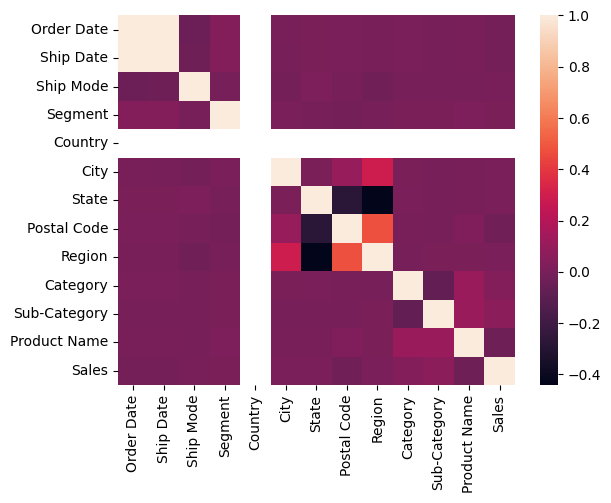

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales
0,20171108,20171111,2,0,0,194,15,42420.0,2,0,4,386,261.9600
1,20171108,20171111,2,0,0,194,15,42420.0,2,0,5,838,731.9400
2,20170612,20170616,2,1,0,265,3,90036.0,3,1,10,1432,14.6200
3,20161011,20161018,3,0,0,153,8,33311.0,2,0,16,366,957.5775
4,20161011,20161018,3,0,0,153,8,33311.0,2,1,14,573,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,20170521,20170528,3,1,0,80,11,60610.0,0,1,3,408,3.7980
9796,20160112,20160117,3,1,0,483,33,43615.0,1,1,2,277,10.3680
9797,20160112,20160117,3,1,0,483,33,43615.0,1,2,13,724,235.1880
9798,20160112,20160117,3,1,0,483,33,43615.0,1,2,13,148,26.3760


In [ ]:
df.drop(columns=['Region','Product Name'],axis=1,inplace=True)

In [ ]:
x=df.iloc[:,:-1]
x

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category
0,20171108,20171111,2,0,0,194,15,42420.0,0,4
1,20171108,20171111,2,0,0,194,15,42420.0,0,5
2,20170612,20170616,2,1,0,265,3,90036.0,1,10
3,20161011,20161018,3,0,0,153,8,33311.0,0,16
4,20161011,20161018,3,0,0,153,8,33311.0,1,14
...,...,...,...,...,...,...,...,...,...,...
9795,20170521,20170528,3,1,0,80,11,60610.0,1,3
9796,20160112,20160117,3,1,0,483,33,43615.0,1,2
9797,20160112,20160117,3,1,0,483,33,43615.0,2,13
9798,20160112,20160117,3,1,0,483,33,43615.0,2,13


In [ ]:
y=df.iloc[:,-1]
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9795      3.7980
9796     10.3680
9797    235.1880
9798     26.3760
9799     10.3840
Name: Sales, Length: 9800, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category
9465,20171119,20171123,3,1,0,450,45,98115.0,0,9
3538,20150509,20150509,1,1,0,194,15,42420.0,1,10
6720,20180919,20180924,3,1,0,265,3,90032.0,2,0
8807,20181026,20181031,3,0,0,372,36,19134.0,1,3
7859,20150530,20150601,0,1,0,327,30,10024.0,1,12
...,...,...,...,...,...,...,...,...,...,...
5734,20180629,20180702,0,1,0,296,5,6460.0,0,9
5191,20180505,20180509,3,0,0,436,3,94122.0,1,7
5390,20181110,20181112,2,1,0,450,45,98105.0,1,3
860,20150609,20150616,3,0,0,436,3,94122.0,1,15


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
# Model Training
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
# Evaluation
print("R2 score is",r2_score(y_test,y_pred))

R2 score is 0.12765192070861242
